In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# import librairies
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [3]:
# import the data from SQL
connection_string = 'mysql+pymysql://root:' + password + '@localhost/credit_card_classification'
engine = create_engine(connection_string)

In [4]:
engine.execute("USE credit_card_classification")

In [65]:
result = engine.execute('SELECT * FROM credit_card_data')
for row in result:
    print(row)
rows = [row for row in result]
pd.DataFrame(rows)

(1, 'No', 'Air Miles', 'Letter', 'High', 1, 'No', 'High', 2, 1, 4, 'No', 1160.75, 1669, 877, 1095)
(2, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 2, 2, 5, 'Yes', 147.25, 39, 106, 78)
(3, 'No', 'Air Miles', 'Postcard', 'High', 2, 'No', 'Medium', 2, 1, 2, 'Yes', 276.5, 367, 352, 145)
(4, 'No', 'Air Miles', 'Letter', 'Medium', 2, 'No', 'High', 1, 1, 4, 'No', 1219.0, 1578, 1760, 1119)
(5, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 2, 1, 6, 'Yes', 1211.0, 2140, 1357, 982)
(6, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'High', 3, 1, 4, 'No', 1114.75, 1847, 1365, 750)
(7, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 2, 1, 3, 'No', 283.75, 468, 188, 347)
(8, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'Medium', 4, 1, 4, 'Yes', 278.5, 132, 391, 285)
(9, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Low', 2, 1, 4, 'Yes', 1005.0, 894, 891, 882)
(10, 'No', 'Air Miles', 'Letter', 'High', 2, 'No', 'Low', 3, 2, 4, 'Yes', 974.25, 1814, 1454, 514)

(1368, 'No', 'Cash Back', 'Letter', 'Low', 1, 'Yes', 'Medium', 1, 1, 4, 'Yes', 933.0, 1803, 1197, 656)
(1369, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'High', 1, 2, 5, 'No', 404.75, 436, 436, 398)
(1370, 'No', 'Points', 'Letter', 'Low', 1, 'Yes', 'High', 1, 1, 4, 'No', 803.5, 507, 837, 976)
(1371, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 3, 'Yes', 866.0, 330, 892, 1451)
(1372, 'No', 'Air Miles', 'Postcard', 'High', 1, 'No', 'High', 3, 1, 3, 'No', 922.5, 1777, 1137, 630)
(1373, 'No', 'Points', 'Postcard', 'High', 1, 'Yes', 'High', 2, 1, 6, 'Yes', 1117.5, 2046, 854, 1092)
(1374, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Low', 2, 1, 3, 'No', 988.25, 1498, 839, 610)
(1375, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'Medium', 3, 1, 3, 'No', 1041.5, 1966, 1172, 842)
(1376, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'Medium', 3, 1, 3, 'Yes', 1185.0, 692, 1488, 1739)
(1377, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'High', 3, 2, 3, 'Yes', 

(2264, 'No', 'Cash Back', 'Letter', 'High', 1, 'Yes', 'Low', 1, 1, 3, 'Yes', 314.75, 313, 381, 82)
(2265, 'No', 'Air Miles', 'Letter', 'Low', 2, 'No', 'High', 1, 1, 5, 'No', 1087.5, 1635, 1439, 961)
(2266, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'High', 3, 1, 5, 'Yes', 1494.75, 1136, 1161, 1954)
(2267, 'No', 'Points', 'Postcard', 'Medium', 1, 'Yes', 'High', 2, 1, 1, 'Yes', 1265.5, 552, 1089, 2129)
(2268, 'No', 'Air Miles', 'Postcard', 'Low', 1, 'No', 'Low', 3, 1, 3, 'Yes', 1080.25, 1690, 1459, 971)
(2269, 'No', 'Air Miles', 'Letter', 'Low', 1, 'No', 'Medium', 1, 1, 4, 'Yes', 718.0, 550, 800, 687)
(2270, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Low', 1, 1, 3, 'No', 717.25, 674, 950, 673)
(2271, 'No', 'Points', 'Letter', 'Low', 1, 'No', 'Low', 1, 1, 5, 'Yes', 1003.25, 1785, 1180, 798)
(2272, 'No', 'Air Miles', 'Letter', 'High', 1, 'No', 'High', 1, 1, 4, 'Yes', 899.25, 948, 423, 949)
(2273, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 3, 'Yes', 880.0, 538

(2576, 'No', 'Points', 'Postcard', 'Low', 2, 'Yes', 'Medium', 2, 1, 3, 'No', 1195.5, 1053, 667, 1918)
(2577, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 2, 1, 2, 'Yes', 819.5, 661, 927, 925)
(2578, 'No', 'Points', 'Postcard', 'Low', 2, 'Yes', 'Medium', 2, 1, 3, 'Yes', 1185.5, 794, 1160, 2028)
(2579, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 2, 4, 'No', 779.0, 933, 715, 501)
(2580, 'No', 'Points', 'Postcard', 'Low', 1, 'No', 'Low', 2, 1, 4, 'Yes', 883.5, 367, 612, 1293)
(2581, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'Low', 2, 1, 4, 'Yes', 200.0, 113, 461, 156)
(2582, 'No', 'Cash Back', 'Postcard', 'Medium', 2, 'No', 'High', 3, 2, 4, 'No', 1106.75, 1028, 975, 1416)
(2583, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'High', 3, 1, 3, 'Yes', 269.5, 223, 198, 369)
(2584, 'No', 'Cash Back', 'Postcard', 'High', 1, 'No', 'Medium', 1, 1, 5, 'Yes', 1228.0, 462, 1315, 2080)
(2585, 'No', 'Cash Back', 'Letter', 'High', 1, 'No', 'Low', 3, 2, 3, 'No', 956.0, 1656

(3561, 'No', 'Points', 'Postcard', 'Medium', 1, 'Yes', 'Low', 2, 1, 4, 'Yes', 910.25, 1853, 1156, 574)
(3562, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Low', 2, 1, 4, 'Yes', 948.75, 522, 478, 1465)
(3563, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 1, 4, 'Yes', 944.25, 1006, 719, 1651)
(3564, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 2, 1, 4, 'No', 1069.25, 1867, 1042, 882)
(3565, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'High', 2, 1, 4, 'No', 1200.25, 754, 883, 2052)
(3566, 'No', 'Points', 'Letter', 'Medium', 2, 'No', 'Medium', 2, 2, 4, 'Yes', 1719.0, 1924, 1702, 1669)
(3567, 'No', 'Points', 'Postcard', 'High', 1, 'No', 'Medium', 2, 1, 3, 'Yes', 629.75, 673, 641, 536)
(3568, 'Yes', 'Cash Back', 'Letter', 'Low', 2, 'Yes', 'Low', 3, 1, 3, 'Yes', 808.5, 630, 946, 847)
(3569, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Low', 2, 1, 3, 'No', 1062.25, 353, 488, 1423)
(3570, 'No', 'Cash Back', 'Letter', 'Low', 1, 'No', 'Medium', 2, 1, 3, 'Y

(4618, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'High', 1, 1, 3, 'No', 769.25, 695, 870, 588)
(4619, 'No', 'Air Miles', 'Postcard', 'High', 1, 'No', 'High', 2, 1, 3, 'Yes', 1068.25, 1921, 1179, 825)
(4620, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'High', 2, 1, 3, 'No', 1034.25, 1915, 1050, 907)
(4621, 'No', 'Points', 'Postcard', 'High', 2, 'No', 'Medium', 2, 1, 4, 'No', 260.5, 266, 174, 247)
(4622, 'No', 'Cash Back', 'Postcard', 'Medium', 2, 'No', 'High', 3, 1, 2, 'Yes', 1548.25, 1465, 1778, 1664)
(4623, 'No', 'Cash Back', 'Letter', 'Medium', 2, 'No', 'Medium', 2, 1, 5, 'Yes', 1281.75, 696, 1311, 1650)
(4624, 'No', 'Points', 'Postcard', 'Low', 1, 'No', 'Medium', 1, 1, 3, 'No', 1051.25, 1813, 829, 1339)
(4625, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Medium', 3, 1, 4, 'Yes', 1131.5, 737, 1313, 1615)
(4626, 'No', 'Points', 'Letter', 'Low', 1, 'No', 'Medium', 1, 1, 3, 'Yes', 989.5, 619, 582, 1082)
(4627, 'No', 'Cash Back', 'Letter', 'High', 1, 'No', 'High', 2, 1, 

(5751, 'No', 'Cash Back', 'Postcard', 'High', 1, 'No', 'Medium', 3, 1, 3, 'Yes', 1062.5, 1946, 1217, 999)
(5752, 'No', 'Air Miles', 'Letter', 'Low', 1, 'No', 'Medium', 1, 1, 3, 'Yes', 1077.0, 1849, 1218, 742)
(5753, 'Yes', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 3, 1, 3, 'Yes', 673.5, 573, 517, 805)
(5754, 'No', 'Points', 'Letter', 'High', 1, 'No', 'Medium', 2, 1, 5, 'Yes', 755.5, 509, 892, 876)
(5755, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 2, 'No', 1730.75, 1540, 1847, 1750)
(5756, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 2, 2, 3, 'No', 779.75, 689, 861, 693)
(5757, 'No', 'Cash Back', 'Postcard', 'High', 1, 'No', 'High', 1, 1, 4, 'Yes', 273.5, 487, 261, 243)
(5758, 'No', 'Points', 'Postcard', 'Medium', 2, 'No', 'Low', 2, 1, 4, 'Yes', 1322.25, 878, 646, 2115)
(5759, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Medium', 3, 1, 4, 'Yes', 279.0, 449, 318, 239)
(5760, 'No', 'Points', 'Letter', 'Medium', 1, 'Yes', 'Medium', 4, 1, 

(6617, 'No', 'Cash Back', 'Postcard', 'High', 1, 'No', 'Medium', 1, 2, 3, 'No', 1061.75, 1630, 1304, 884)
(6618, 'No', 'Points', 'Postcard', 'Medium', 2, 'No', 'Medium', 3, 1, 5, 'No', 1023.75, 1924, 1233, 600)
(6619, 'No', 'Points', 'Letter', 'Low', 1, 'No', 'Medium', 2, 1, 4, 'Yes', 329.5, 314, 451, 285)
(6620, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Medium', 1, 1, 2, 'Yes', 258.5, 163, 368, 394)
(6621, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'High', 1, 2, 3, 'No', 1307.0, 2053, 1191, 1003)
(6622, 'No', 'Cash Back', 'Letter', 'Low', 1, 'No', 'Low', 2, 1, 3, 'Yes', 354.75, 470, 16, 492)
(6623, 'No', 'Cash Back', 'Letter', 'High', 1, 'No', 'High', 2, 1, 3, 'No', 1154.25, 764, 943, 2095)
(6624, 'No', 'Points', 'Letter', 'Medium', 2, 'Yes', 'Medium', 2, 1, 5, 'Yes', 1198.5, 1710, 1571, 1314)
(6625, 'No', 'Points', 'Letter', 'High', 1, 'No', 'Low', 3, 2, 2, 'No', 1300.75, 787, 1123, 1453)
(6626, 'No', 'Cash Back', 'Letter', 'High', 1, 'No', 'Low', 1, 2, 5, 'No', 1005.

(7671, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'High', 2, 1, 3, 'Yes', 1455.5, 1360, 1300, 2108)
(7672, 'No', 'Air Miles', 'Postcard', 'Low', 1, 'No', 'Low', 1, 1, 4, 'Yes', 1446.25, 935, 1731, 1834)
(7673, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Low', 1, 2, 3, 'No', 1038.75, 31, 1727, 1486)
(7674, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 3, 1, 3, 'Yes', 1084.75, 1721, 1328, 984)
(7675, 'No', 'Cash Back', 'Letter', 'High', 1, 'No', 'High', 2, 1, 3, 'No', 163.5, 337, 31, 218)
(7676, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'Low', 3, 1, 2, 'No', 214.25, 382, 151, 220)
(7677, 'No', 'Cash Back', 'Letter', 'Low', 1, 'No', 'Low', 1, 1, 4, 'Yes', 1196.25, 269, 960, 1593)
(7678, 'Yes', 'Points', 'Letter', 'Medium', 1, 'No', 'Medium', 2, 1, 3, 'Yes', 1003.25, 1540, 1164, 787)
(7679, 'No', 'Cash Back', 'Letter', 'Low', 3, 'No', 'Medium', 2, 1, 4, 'Yes', 648.75, 627, 514, 717)
(7680, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'Yes', 'Low', 2, 1, 6, 'No', 

(8253, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'Yes', 'Low', 3, 1, 3, 'Yes', 1038.25, 859, 814, 1762)
(8254, 'Yes', 'Air Miles', 'Letter', 'Medium', 1, 'Yes', 'Medium', 3, 1, 3, 'Yes', 956.75, 1705, 1111, 804)
(8255, 'No', 'Cash Back', 'Postcard', 'Low', 3, 'No', 'High', 3, 1, 6, 'Yes', 1094.75, 2169, 1411, 644)
(8256, 'No', 'Cash Back', 'Letter', 'Low', 1, 'No', 'Medium', 1, 1, 2, 'No', 994.5, 1599, 1675, 438)
(8257, 'No', 'Air Miles', 'Postcard', 'Low', 1, 'No', 'High', 1, 1, 3, 'Yes', 784.75, 993, 546, 854)
(8258, 'No', 'Points', 'Letter', 'Low', 1, 'No', 'High', 3, 1, 4, 'Yes', 793.0, 115, 578, 1519)
(8259, 'No', 'Points', 'Letter', 'Low', 1, 'No', 'High', 2, 1, 4, 'No', 306.75, 457, 308, 235)
(8260, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 4, 'No', 1232.75, 580, 1570, 1490)
(8261, 'No', 'Points', 'Letter', 'High', 1, 'Yes', 'High', 1, 1, 4, 'No', 803.25, 879, 743, 826)
(8262, 'Yes', 'Air Miles', 'Postcard', 'Low', 2, 'No', 'Low', 2, 1, 4, 'Yes', 1127.0, 1

(8658, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'Low', 2, 1, 2, 'Yes', 134.5, 325, 187, 15)
(8659, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 2, 'No', 1252.0, 635, 888, 1739)
(8660, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Medium', 4, 1, 5, 'Yes', 1260.0, 1798, 1762, 876)
(8661, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Low', 3, 1, 3, 'No', 1101.25, 586, 418, 1502)
(8662, 'No', 'Cash Back', 'Letter', 'Low', 1, 'No', 'Low', 1, 1, 3, 'Yes', 784.5, 827, 689, 993)
(8663, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'High', 1, 1, 2, 'No', 777.75, 651, 963, 798)
(8664, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'High', 1, 2, 3, 'Yes', 1343.25, 776, 1063, 1412)
(8665, 'No', 'Points', 'Postcard', 'High', 1, 'No', 'High', 2, 1, 4, 'Yes', 792.75, 704, 879, 958)
(8666, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Medium', 1, 1, 5, 'Yes', 929.25, 1722, 1319, 647)
(8667, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'Yes', 'Medium', 3, 1, 1, 'No

(9160, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'High', 2, 1, 4, 'No', 1745.25, 1588, 1612, 1974)
(9161, 'Yes', 'Air Miles', 'Postcard', 'Medium', 2, 'No', 'Low', 2, 1, 3, 'Yes', 652.0, 773, 595, 663)
(9162, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'Low', 1, 1, 3, 'No', 1086.25, 1739, 1495, 944)
(9163, 'No', 'Air Miles', 'Postcard', 'Medium', 2, 'No', 'High', 3, 1, 4, 'Yes', 977.5, 1720, 1380, 686)
(9164, 'No', 'Cash Back', 'Postcard', 'High', 2, 'No', 'Medium', 1, 1, 3, 'Yes', 837.5, 228, 755, 951)
(9165, 'No', 'Air Miles', 'Letter', 'Low', 1, 'No', 'Low', 3, 1, 3, 'No', 845.0, 557, 1002, 1356)
(9166, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'High', 2, 1, 2, 'Yes', 1262.25, 213, 1479, 2090)
(9167, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Low', 3, 1, 3, 'Yes', 888.75, 266, 684, 1031)
(9168, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'Yes', 'Low', 3, 1, 4, 'Yes', 851.5, 530, 534, 804)
(9169, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'High', 4, 2, 2, 'N

(10032, 'Yes', 'Points', 'Letter', 'Medium', 1, 'No', 'Low', 3, 1, 2, 'Yes', 1327.25, 1255, 1018, 2116)
(10033, 'No', 'Points', 'Letter', 'Medium', 1, 'Yes', 'Low', 1, 1, 5, 'Yes', 1131.75, 1982, 1450, 777)
(10034, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Low', 3, 1, 6, 'Yes', 1326.5, 1351, 886, 1671)
(10035, 'No', 'Points', 'Postcard', 'Medium', 2, 'No', 'Low', 1, 1, 2, 'Yes', 892.5, 463, 773, 976)
(10036, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'Yes', 'High', 2, 1, 5, 'Yes', 1022.0, 282, 812, 1374)
(10037, 'No', 'Air Miles', 'Letter', 'High', 1, 'No', 'High', 2, 2, 6, 'No', 962.75, 1922, 1067, 614)
(10038, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'High', 3, 2, 5, 'No', 1339.0, 1320, 1565, 1993)
(10039, 'No', 'Points', 'Postcard', 'Medium', 2, 'No', 'Medium', 2, 1, 2, 'Yes', 1193.75, 1863, 1341, 1066)
(10041, 'No', 'Points', 'Letter', 'High', 1, 'Yes', 'Medium', 1, 1, 4, 'Yes', 911.75, 1573, 1355, 523)
(10042, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'High'

(10928, 'No', 'Air Miles', 'Postcard', 'High', 1, 'No', 'Low', 2, 1, 2, 'No', 733.0, 139, 855, 1248)
(10929, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Medium', 1, 1, 5, 'No', 1258.5, 921, 1362, 1922)
(10930, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'Yes', 'High', 3, 1, 3, 'Yes', 1103.0, 2105, 1227, 818)
(10931, 'No', 'Air Miles', 'Letter', 'Low', 1, 'No', 'High', 1, 1, 5, 'Yes', 744.75, 712, 695, 742)
(10932, 'No', 'Points', 'Letter', 'Medium', 2, 'No', 'Low', 1, 1, 4, 'Yes', 188.0, 334, 64, 295)
(10933, 'No', 'Cash Back', 'Letter', 'High', 1, 'Yes', 'Low', 1, 2, 3, 'Yes', 1000.0, 322, 541, 1132)
(10934, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Low', 2, 1, 4, 'Yes', 1110.25, 268, 1381, 1679)
(10935, 'No', 'Cash Back', 'Letter', 'Medium', 2, 'No', 'Low', 1, 1, 3, 'Yes', 248.25, 284, 340, 96)
(10936, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'Low', 2, 1, 3, 'Yes', 1711.0, 1464, 1810, 2233)
(10937, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'Low', 1, 1, 4, 'Yes',

(11741, 'No', 'Cash Back', 'Postcard', 'Low', 3, 'No', 'Low', 2, 1, 3, 'Yes', 1286.0, 989, 1270, 1860)
(11742, 'No', 'Cash Back', 'Postcard', 'High', 2, 'No', 'High', 1, 1, 5, 'Yes', 888.25, 598, 403, 1969)
(11743, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Low', 1, 1, 5, 'No', 315.5, 462, 412, 63)
(11744, 'No', 'Cash Back', 'Postcard', 'High', 1, 'No', 'High', 2, 1, 2, 'No', 148.75, 90, 23, 370)
(11745, 'No', 'Cash Back', 'Letter', 'Medium', 2, 'No', 'Medium', 1, 1, 4, 'Yes', 1204.25, 1543, 1739, 1306)
(11746, 'Yes', 'Air Miles', 'Letter', 'Low', 1, 'No', 'Medium', 2, 1, 6, 'Yes', 267.75, 55, 141, 478)
(11747, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 1, 4, 'Yes', 1216.25, 1503, 1371, 1128)
(11748, 'No', 'Points', 'Postcard', 'High', 2, 'Yes', 'Low', 3, 1, 3, 'Yes', 227.0, 406, 399, 17)
(11749, 'No', 'Cash Back', 'Letter', 'High', 1, 'No', 'High', 2, 1, 2, 'No', 982.25, 914, 1234, 1245)
(11750, 'No', 'Air Miles', 'Letter', 'High', 3, 'Yes', 'High', 1, 1, 3, 'Ye

(11980, 'No', 'Air Miles', 'Letter', 'Low', 2, 'No', 'Medium', 2, 1, 5, 'Yes', 308.75, 426, 486, 67)
(11981, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Low', 2, 1, 2, 'Yes', 422.0, 311, 497, 411)
(11982, 'No', 'Points', 'Letter', 'High', 1, 'No', 'High', 1, 1, 3, 'Yes', 1285.75, 741, 1788, 1483)
(11983, 'No', 'Points', 'Letter', 'Medium', 2, 'No', 'High', 2, 1, 5, 'Yes', 949.5, 633, 518, 1222)
(11984, 'No', 'Air Miles', 'Letter', 'Low', 1, 'No', 'High', 3, 1, 3, 'No', 201.75, 263, 79, 222)
(11985, 'No', 'Air Miles', 'Postcard', 'High', 1, 'No', 'High', 1, 2, 3, 'No', 190.0, 142, 36, 325)
(11986, 'No', 'Points', 'Letter', 'Low', 1, 'Yes', 'Medium', 1, 1, 3, 'Yes', 1036.5, 1885, 1409, 526)
(11987, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'High', 1, 1, 5, 'No', 1036.25, 241, 834, 1958)
(11988, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'Yes', 'High', 3, 1, 3, 'No', 945.75, 811, 647, 1104)
(11989, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'High', 2, 2, 4, 'Yes', 1271.75

(12977, 'No', 'Air Miles', 'Postcard', 'Low', 2, 'Yes', 'Medium', 2, 1, 3, 'Yes', 1235.75, 580, 1091, 1515)
(12978, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'Yes', 'Low', 1, 1, 3, 'No', 754.5, 851, 724, 814)
(12979, 'No', 'Air Miles', 'Letter', 'Medium', 2, 'No', 'Medium', 1, 1, 4, 'Yes', 965.25, 240, 1344, 1059)
(12980, 'No', 'Points', 'Postcard', 'High', 1, 'No', 'Low', 2, 1, 4, 'No', 1248.25, 374, 1595, 2198)
(12981, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'High', 1, 2, 4, 'Yes', 1035.75, 731, 784, 1247)
(12982, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 1, 4, 'Yes', 1328.0, 1051, 1309, 1084)
(12983, 'No', 'Air Miles', 'Letter', 'Low', 1, 'Yes', 'High', 2, 1, 4, 'Yes', 903.0, 190, 528, 1403)
(12984, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 4, 'Yes', 1037.75, 185, 1724, 1621)
(12985, 'No', 'Air Miles', 'Postcard', 'High', 2, 'No', 'High', 2, 2, 4, 'Yes', 980.5, 914, 646, 1420)
(12986, 'No', 'Points', 'Postcard', 'Medium', 1, 'No

(14060, 'No', 'Points', 'Letter', 'Low', 1, 'No', 'Medium', 1, 1, 4, 'No', 1222.25, 1443, 1679, 1318)
(14061, 'No', 'Points', 'Postcard', 'Low', 1, 'No', 'Medium', 1, 1, 2, 'No', 800.5, 536, 604, 833)
(14062, 'No', 'Points', 'Letter', 'High', 1, 'No', 'Medium', 3, 2, 5, 'Yes', 1513.0, 1367, 1228, 2104)
(14063, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Low', 2, 1, 3, 'Yes', 1034.25, 1647, 1361, 832)
(14064, 'No', 'Cash Back', 'Letter', 'High', 1, 'No', 'Low', 2, 2, 4, 'No', 1284.25, 1907, 1357, 1077)
(14065, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'High', 2, 1, 3, 'Yes', 1049.5, 292, 1548, 1216)
(14066, 'No', 'Air Miles', 'Letter', 'Medium', 2, 'No', 'Low', 2, 1, 4, 'No', 880.0, 1511, 1002, 701)
(14067, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 2, 4, 'No', 1229.25, 335, 811, 2266)
(14068, 'No', 'Air Miles', 'Letter', 'Low', 1, 'No', 'High', 3, 2, 5, 'No', 697.25, 532, 856, 760)
(14069, 'No', 'Air Miles', 'Postcard', 'Low', 1, 'No', 'High', 1, 2, 3, 'No',

(15034, 'No', 'Points', 'Letter', 'Low', 2, 'No', 'Low', 3, 1, 5, 'Yes', 1282.0, 799, 1369, 1127)
(15035, 'No', 'Points', 'Postcard', 'Medium', 1, 'Yes', 'High', 2, 2, 4, 'Yes', 1173.0, 740, 700, 1173)
(15036, 'No', 'Air Miles', 'Letter', 'High', 1, 'Yes', 'Medium', 1, 1, 3, 'No', 816.75, 992, 531, 827)
(15037, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Low', 2, 1, 5, 'No', 698.5, 704, 634, 549)
(15038, 'No', 'Air Miles', 'Letter', 'Medium', 3, 'No', 'Medium', 3, 2, 3, 'Yes', 1201.75, 1987, 993, 1290)
(15039, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'High', 2, 1, 6, 'No', 789.5, 21, 501, 1701)
(15040, 'No', 'Cash Back', 'Letter', 'Low', 1, 'No', 'High', 1, 1, 3, 'No', 810.0, 774, 917, 596)
(15041, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Medium', 1, 1, 4, 'Yes', 1127.25, 1544, 1724, 643)
(15042, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 2, 3, 'No', 641.0, 668, 654, 506)
(15043, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 4, 'Yes'

(15839, 'No', 'Air Miles', 'Postcard', 'High', 1, 'No', 'Medium', 3, 1, 4, 'No', 209.25, 45, 105, 406)
(15840, 'No', 'Points', 'Letter', 'High', 1, 'No', 'Low', 3, 2, 2, 'Yes', 1153.25, 148, 1731, 1910)
(15841, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Low', 2, 1, 3, 'No', 1016.75, 175, 1287, 1335)
(15842, 'No', 'Cash Back', 'Letter', 'Medium', 3, 'Yes', 'Medium', 3, 1, 2, 'Yes', 1303.5, 554, 1410, 1935)
(15843, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Low', 1, 2, 2, 'Yes', 1200.25, 769, 1535, 1143)
(15844, 'No', 'Points', 'Letter', 'Low', 1, 'No', 'Medium', 2, 1, 3, 'No', 750.0, 624, 583, 949)
(15845, 'No', 'Cash Back', 'Letter', 'Medium', 2, 'No', 'Low', 1, 1, 4, 'No', 1374.25, 784, 1399, 1450)
(15846, 'No', 'Points', 'Letter', 'Low', 2, 'No', 'Medium', 2, 1, 4, 'No', 1143.0, 1950, 1429, 821)
(15847, 'No', 'Air Miles', 'Letter', 'High', 1, 'No', 'Low', 2, 1, 2, 'Yes', 923.75, 1700, 1132, 783)
(15848, 'No', 'Air Miles', 'Postcard', 'Medium', 2, 'No', 'High', 1, 1, 3, 

(16943, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'High', 1, 1, 2, 'No', 1100.75, 1376, 860, 850)
(16944, 'No', 'Cash Back', 'Postcard', 'Low', 2, 'No', 'Medium', 1, 1, 2, 'Yes', 930.75, 1918, 1025, 530)
(16945, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 2, 'Yes', 343.25, 437, 241, 434)
(16946, 'No', 'Cash Back', 'Postcard', 'Low', 1, 'No', 'High', 2, 1, 2, 'Yes', 1056.25, 61, 1285, 1517)
(16947, 'No', 'Cash Back', 'Letter', 'Medium', 2, 'No', 'Low', 1, 1, 2, 'No', 770.0, 519, 715, 850)
(16948, 'No', 'Air Miles', 'Postcard', 'High', 2, 'No', 'Low', 2, 1, 4, 'Yes', 770.0, 620, 505, 957)
(16949, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 1, 3, 'Yes', 356.0, 426, 221, 279)
(16950, 'No', 'Air Miles', 'Letter', 'Low', 1, 'No', 'High', 3, 1, 3, 'Yes', 985.25, 258, 765, 1374)
(16951, 'No', 'Cash Back', 'Postcard', 'Medium', 1, 'No', 'Low', 3, 1, 5, 'Yes', 544.5, 516, 567, 517)
(16952, 'No', 'Cash Back', 'Letter', 'Medium', 1, 'No', 'High', 1, 1, 2, 'Yes',

(17939, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'No', 'Medium', 2, 1, 4, 'Yes', 1065.0, 1568, 1254, 750)
(17940, 'No', 'Points', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 1, 5, 'Yes', 981.5, 754, 589, 1207)
(17941, 'Yes', 'Air Miles', 'Postcard', 'Medium', 1, 'Yes', 'Low', 2, 1, 4, 'Yes', 1140.25, 634, 1076, 1966)
(17942, 'No', 'Air Miles', 'Postcard', 'High', 1, 'No', 'High', 1, 1, 3, 'No', 1178.75, 792, 909, 1445)
(17943, 'Yes', 'Air Miles', 'Postcard', 'Low', 1, 'No', 'Medium', 1, 1, 3, 'Yes', 1026.25, 297, 1672, 1569)
(17944, 'No', 'Air Miles', 'Postcard', 'Medium', 1, 'Yes', 'Medium', 1, 1, 4, 'Yes', 908.0, 1208, 1205, 780)
(17945, 'No', 'Points', 'Postcard', 'Medium', 1, 'No', 'Medium', 1, 1, 3, 'No', 1061.0, 1912, 1266, 890)
(17946, 'No', 'Points', 'Postcard', 'Low', 2, 'No', 'Low', 2, 1, 3, 'Yes', 1112.0, 522, 736, 1671)
(17947, 'No', 'Air Miles', 'Letter', 'Medium', 1, 'No', 'Medium', 1, 2, 4, 'No', 1065.0, 1647, 1298, 833)
(17948, 'No', 'Points', 'Letter', 'Medium', 2, 'N

Empty DataFrame
Columns: []
Index: []

In [5]:
# read the data with SQL Query
data = pd.read_sql_query('SELECT * FROM credit_card_data', engine)
data.head()

Customer Number Offer Accepted Reward Type Mailer Type Income Level  \
0                1             No   Air Miles      Letter         High   
1                2             No   Air Miles      Letter       Medium   
2                3             No   Air Miles    Postcard         High   
3                4             No   Air Miles      Letter       Medium   
4                5             No   Air Miles      Letter       Medium   

   Bank Accounts Open Overdraft Protection Credit Rating  Credit Cards Held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   Homes Owned  Household Size Own Your Home  Average Balance    Q1    Q2  \
0            1               4            No          1160.75  1669   877   
1            2               5           Yes           147.25    39   106   
2            1               2           Yes           276.50   367   352   
3            1               4            No          1219.00  1578  1760   
4            1               6           Yes          1211.00  2140  1357   

     Q3  
0  1095  
1    78  
2   145  
3  1119  
4   982

In [6]:
# rename the columns so they follow the PE8 (snake case).
data.columns

Index(['Customer Number', 'Offer Accepted', 'Reward Type', 'Mailer Type',
       'Income Level', 'Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size',
       'Own Your Home', 'Average Balance', 'Q1', 'Q2', 'Q3'],
      dtype='object')

In [7]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['customer number', 'offer accepted', 'reward type', 'mailer type',
       'income level', 'bank accounts open', 'overdraft protection',
       'credit rating', 'credit cards held', 'homes owned', 'household size',
       'own your home', 'average balance', 'q1', 'q2', 'q3'],
      dtype='object')

In [8]:
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['customer_number', 'offer_accepted', 'reward_type', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1', 'q2', 'q3'],
      dtype='object')

In [70]:
# first look at its main features (shape, info, types)
data.dtypes

customer_number           int64
offer_accepted           object
reward_type              object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1                        int64
q2                        int64
q3                        int64
dtype: object

In [71]:
data.shape

(17976, 16)

In [72]:
data.info

<bound method DataFrame.info of        customer_number offer_accepted reward_type mailer_type income_level  \
0                    1             No   Air Miles      Letter         High   
1                    2             No   Air Miles      Letter       Medium   
2                    3             No   Air Miles    Postcard         High   
3                    4             No   Air Miles      Letter       Medium   
4                    5             No   Air Miles      Letter       Medium   
...                ...            ...         ...         ...          ...   
17971            17996             No   Cash Back      Letter         High   
17972            17997             No   Cash Back      Letter         High   
17973            17998             No   Cash Back      Letter         High   
17974            17999             No   Cash Back      Letter       Medium   
17975            18000             No   Cash Back      Letter          Low   

       bank_accounts_open overd

In [73]:
# checking NAs -> 0
data.isna().sum()

customer_number         0
offer_accepted          0
reward_type             0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1                      0
q2                      0
q3                      0
dtype: int64

In [9]:
# set customer_number as index because we want to keep the data but it doesn't gives us many informations
data = data.set_index(data['customer_number'])
data.head()

customer_number offer_accepted reward_type mailer_type  \
customer_number                                                           
1                              1             No   Air Miles      Letter   
2                              2             No   Air Miles      Letter   
3                              3             No   Air Miles    Postcard   
4                              4             No   Air Miles      Letter   
5                              5             No   Air Miles      Letter   

                income_level  bank_accounts_open overdraft_protection  \
customer_number                                                         
1                       High                   1                   No   
2                     Medium                   1                   No   
3                       High                   2                   No   
4                     Medium                   2                   No   
5                     Medium                   1                   No   

                credit_rating  credit_cards_held  homes_owned  household_size  \
customer_number                                                                 
1                        High                  2            1               4   
2                      Medium                  2            2               5   
3                      Medium                  2            1               2   
4                        High                  1            1               4   
5                      Medium                  2            1               6   

                own_your_home  average_balance    q1    q2    q3  
customer_number                                                   
1                          No          1160.75  1669   877  1095  
2                         Yes           147.25    39   106    78  
3                         Yes           276.50   367   352   145  
4                          No          1219.00  1578  1760  1119  
5                         Yes          1211.00  2140  1357   982

In [10]:
# separate categoricals and numericals data
categoricals = data.select_dtypes(np.object)
categoricals.head()

offer_accepted reward_type mailer_type income_level  \
customer_number                                                       
1                           No   Air Miles      Letter         High   
2                           No   Air Miles      Letter       Medium   
3                           No   Air Miles    Postcard         High   
4                           No   Air Miles      Letter       Medium   
5                           No   Air Miles      Letter       Medium   

                overdraft_protection credit_rating own_your_home  
customer_number                                                   
1                                 No          High            No  
2                                 No        Medium           Yes  
3                                 No        Medium           Yes  
4                                 No          High            No  
5                                 No        Medium           Yes

In [11]:
categoricals.shape

(17976, 7)

In [12]:
numericals = data.select_dtypes(np.number)
numericals.head()

customer_number  bank_accounts_open  credit_cards_held  \
customer_number                                                           
1                              1                   1                  2   
2                              2                   1                  2   
3                              3                   2                  2   
4                              4                   2                  1   
5                              5                   1                  2   

                 homes_owned  household_size  average_balance    q1    q2  \
customer_number                                                             
1                          1               4          1160.75  1669   877   
2                          2               5           147.25    39   106   
3                          1               2           276.50   367   352   
4                          1               4          1219.00  1578  1760   
5                          1               6          1211.00  2140  1357   

                   q3  
customer_number        
1                1095  
2                  78  
3                 145  
4                1119  
5                 982

In [78]:
numericals.shape

(17976, 8)

In [79]:
numericals.describe()

bank_accounts_open  credit_cards_held   homes_owned  household_size  \
count        17976.000000       17976.000000  17976.000000    17976.000000   
mean             1.255730           1.903427      1.203549        3.499110   
std              0.472405           0.797086      0.427446        1.114476   
min              1.000000           1.000000      1.000000        1.000000   
25%              1.000000           1.000000      1.000000        3.000000   
50%              1.000000           2.000000      1.000000        3.000000   
75%              1.000000           2.000000      1.000000        4.000000   
max              3.000000           4.000000      3.000000        9.000000   

       average_balance            q1            q2            q3  
count     17976.000000  17976.000000  17976.000000  17976.000000  
mean        940.515562    910.450656    999.392190   1042.033600  
std         350.297837    620.077060    457.402268    553.452599  
min          48.250000      0.000000      0.000000      0.000000  
25%         787.500000    392.750000    663.000000    633.000000  
50%        1007.000000    772.000000   1032.000000    945.500000  
75%        1153.250000   1521.000000   1342.000000   1463.000000  
max        3366.250000   3450.000000   3421.000000   3823.000000

In [13]:
# get numerical data from categoricals (dummify)
categorical_cols = categoricals.columns
categorical_dummies = pd.get_dummies(categoricals, columns = categorical_cols, drop_first = True)
categorical_dummies

offer_accepted_Yes  reward_type_Cash Back  \
customer_number                                              
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   
5                                 0                      0   
...                             ...                    ...   
17996                             0                      1   
17997                             0                      1   
17998                             0                      1   
17999                             0                      1   
18000                             0                      1   

                 reward_type_Points  mailer_type_Postcard  income_level_Low  \
customer_number                                                               
1                                 0                     0                 0   
2                                 0                     0                 0   
3                                 0                     1                 0   
4                                 0                     0                 0   
5                                 0                     0                 0   
...                             ...                   ...               ...   
17996                             0                     0                 0   
17997                             0                     0                 0   
17998                             0                     0                 0   
17999                             0                     0                 0   
18000                             0                     0                 1   

                 income_level_Medium  overdraft_protection_Yes  \
customer_number                                                  
1                                  0                         0   
2                                  1                         0   
3                                  0                         0   
4                                  1                         0   
5                                  1                         0   
...                              ...                       ...   
17996                              0                         0   
17997                              0                         0   
17998                              0                         0   
17999                              1                         0   
18000                              0                         0   

                 credit_rating_Low  credit_rating_Medium  own_your_home_Yes  
customer_number                                                              
1                                0                     0                  0  
2                                0                     1                  1  
3                                0                     1                  1  
4                                0                     0                  0  
5                                0                     1                  1  
...                            ...                   ...                ...  
17996                            1                     0                  1  
17997                            1                     0                  1  
17998                            1                     0                  0  
17999                            0                     1                  1  
18000                            0                     1                  0  

[17976 rows x 10 columns]

In [14]:
# Concatenate
new_data = pd.concat([numericals,categorical_dummies],join = 'inner',axis =1)
new_data

customer_number  bank_accounts_open  credit_cards_held  \
customer_number                                                           
1                              1                   1                  2   
2                              2                   1                  2   
3                              3                   2                  2   
4                              4                   2                  1   
5                              5                   1                  2   
...                          ...                 ...                ...   
17996                      17996                   1                  1   
17997                      17997                   1                  3   
17998                      17998                   1                  2   
17999                      17999                   1                  4   
18000                      18000                   2                  2   

                 homes_owned  household_size  average_balance    q1    q2  \
customer_number                                                             
1                          1               4          1160.75  1669   877   
2                          2               5           147.25    39   106   
3                          1               2           276.50   367   352   
4                          1               4          1219.00  1578  1760   
5                          1               6          1211.00  2140  1357   
...                      ...             ...              ...   ...   ...   
17996                      1               5           167.50   136    65   
17997                      1               3           850.50   984   940   
17998                      1               4          1087.25   918   767   
17999                      2               2          1022.25   626   983   
18000                      1               3          1056.00   265  1378   

                   q3  offer_accepted_Yes  reward_type_Cash Back  \
customer_number                                                    
1                1095                   0                      0   
2                  78                   0                      0   
3                 145                   0                      0   
4                1119                   0                      0   
5                 982                   0                      0   
...               ...                 ...                    ...   
17996              71                   0                      1   
17997             943                   0                      1   
17998            1170                   0                      1   
17999             865                   0                      1   
18000            1978                   0                      1   

                 reward_type_Points  mailer_type_Postcard  income_level_Low  \
customer_number                                                               
1                                 0                     0                 0   
2                                 0                     0                 0   
3                                 0                     1                 0   
4                                 0                     0                 0   
5                                 0                     0                 0   
...                             ...                   ...               ...   
17996                             0                     0                 0   
17997                             0                     0                 0   
17998                             0                     0                 0   
17999                             0                     0                 0   
18000                             0                     0                 1   

                 income_level_Medium  overdraft_protection_Yes  \
customer_number                                             

In [15]:
# Drop the target variable : offer_accepted
new_data = new_data.drop(['offer_accepted_Yes'], axis=1)
new_data

customer_number  bank_accounts_open  credit_cards_held  \
customer_number                                                           
1                              1                   1                  2   
2                              2                   1                  2   
3                              3                   2                  2   
4                              4                   2                  1   
5                              5                   1                  2   
...                          ...                 ...                ...   
17996                      17996                   1                  1   
17997                      17997                   1                  3   
17998                      17998                   1                  2   
17999                      17999                   1                  4   
18000                      18000                   2                  2   

                 homes_owned  household_size  average_balance    q1    q2  \
customer_number                                                             
1                          1               4          1160.75  1669   877   
2                          2               5           147.25    39   106   
3                          1               2           276.50   367   352   
4                          1               4          1219.00  1578  1760   
5                          1               6          1211.00  2140  1357   
...                      ...             ...              ...   ...   ...   
17996                      1               5           167.50   136    65   
17997                      1               3           850.50   984   940   
17998                      1               4          1087.25   918   767   
17999                      2               2          1022.25   626   983   
18000                      1               3          1056.00   265  1378   

                   q3  reward_type_Cash Back  reward_type_Points  \
customer_number                                                    
1                1095                      0                   0   
2                  78                      0                   0   
3                 145                      0                   0   
4                1119                      0                   0   
5                 982                      0                   0   
...               ...                    ...                 ...   
17996              71                      1                   0   
17997             943                      1                   0   
17998            1170                      1                   0   
17999             865                      1                   0   
18000            1978                      1                   0   

                 mailer_type_Postcard  income_level_Low  income_level_Medium  \
customer_number                                                                
1                                   0                 0                    0   
2                                   0                 0                    1   
3                                   1                 0                    0   
4                                   0                 0                    1   
5                                   0                 0                    1   
...                               ...               ...                  ...   
17996                               0                 0                    0   
17997                               0                 0                    0   
17998                               0                 0                    0   
17999                               0                 0                    1   
18000                               0                 1                    0   

                 overdraft_protection_Yes  credit_rating_Low  \
customer_number                                  

In [16]:
# drop customer_number because we set it as index
new_data = new_data.drop(['customer_number'], axis=1)
new_data

bank_accounts_open  credit_cards_held  homes_owned  \
customer_number                                                       
1                                 1                  2            1   
2                                 1                  2            2   
3                                 2                  2            1   
4                                 2                  1            1   
5                                 1                  2            1   
...                             ...                ...          ...   
17996                             1                  1            1   
17997                             1                  3            1   
17998                             1                  2            1   
17999                             1                  4            2   
18000                             2                  2            1   

                 household_size  average_balance    q1    q2    q3  \
customer_number                                                      
1                             4          1160.75  1669   877  1095   
2                             5           147.25    39   106    78   
3                             2           276.50   367   352   145   
4                             4          1219.00  1578  1760  1119   
5                             6          1211.00  2140  1357   982   
...                         ...              ...   ...   ...   ...   
17996                         5           167.50   136    65    71   
17997                         3           850.50   984   940   943   
17998                         4          1087.25   918   767  1170   
17999                         2          1022.25   626   983   865   
18000                         3          1056.00   265  1378  1978   

                 reward_type_Cash Back  reward_type_Points  \
customer_number                                              
1                                    0                   0   
2                                    0                   0   
3                                    0                   0   
4                                    0                   0   
5                                    0                   0   
...                                ...                 ...   
17996                                1                   0   
17997                                1                   0   
17998                                1                   0   
17999                                1                   0   
18000                                1                   0   

                 mailer_type_Postcard  income_level_Low  income_level_Medium  \
customer_number                                                                
1                                   0                 0                    0   
2                                   0                 0                    1   
3                                   1                 0                    0   
4                                   0                 0                    1   
5                                   0                 0                    1   
...                               ...               ...                  ...   
17996                               0                 0                    0   
17997                               0                 0                    0   
17998                               0                 0                    0   
17999                               0                 0                    1   
18000                               0                 1                    0   

                 overdraft_protection_Yes  credit_rating_Low  \
customer_number                                                
1                                       0                  0   
2                                       0                  0   
3                                       0                  0   
4             

In [32]:
# drop customer_number because we set it as index
new_data = new_data.drop(['q1'], axis=1)
new_data = new_data.drop(['q2'], axis=1)
new_data = new_data.drop(['q3'], axis=1)
new_data

bank_accounts_open  credit_cards_held  homes_owned  \
customer_number                                                       
1                                 1                  2            1   
2                                 1                  2            2   
3                                 2                  2            1   
4                                 2                  1            1   
5                                 1                  2            1   
...                             ...                ...          ...   
17996                             1                  1            1   
17997                             1                  3            1   
17998                             1                  2            1   
17999                             1                  4            2   
18000                             2                  2            1   

                 household_size  average_balance  reward_type_Cash Back  \
customer_number                                                           
1                             4          1160.75                      0   
2                             5           147.25                      0   
3                             2           276.50                      0   
4                             4          1219.00                      0   
5                             6          1211.00                      0   
...                         ...              ...                    ...   
17996                         5           167.50                      1   
17997                         3           850.50                      1   
17998                         4          1087.25                      1   
17999                         2          1022.25                      1   
18000                         3          1056.00                      1   

                 reward_type_Points  mailer_type_Postcard  income_level_Low  \
customer_number                                                               
1                                 0                     0                 0   
2                                 0                     0                 0   
3                                 0                     1                 0   
4                                 0                     0                 0   
5                                 0                     0                 0   
...                             ...                   ...               ...   
17996                             0                     0                 0   
17997                             0                     0                 0   
17998                             0                     0                 0   
17999                             0                     0                 0   
18000                             0                     0                 1   

                 income_level_Medium  overdraft_protection_Yes  \
customer_number                                                  
1                                  0                         0   
2                                  1                         0   
3                                  0                         0   
4                                  1                         0   
5                                  1                         0   
...                              ...                       ...   
17996                              0                         0   
17997                              0                         0   
17998                              0                         0   
17999                              1                         0   
18000                              0                         0   

                 credit_rating_Low  credit_rating_Medium  own_your_home_Yes  
customer_number                                                              
1                                0                     0                  

In [132]:
# calcul the balance
data['offer_accepted'].value_counts() / len(data['offer_accepted'])

No     0.943202
Yes    0.056798
Name: offer_accepted, dtype: float64

In [33]:
data['offer_accepted'].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

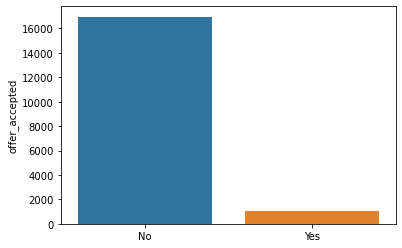

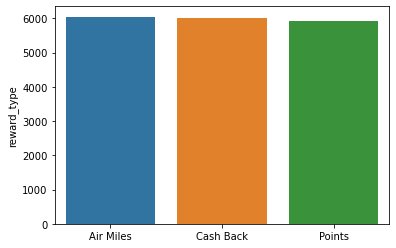

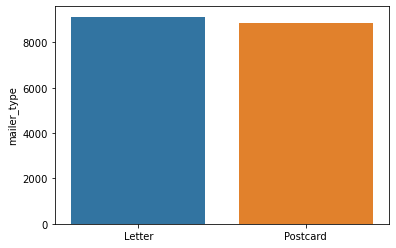

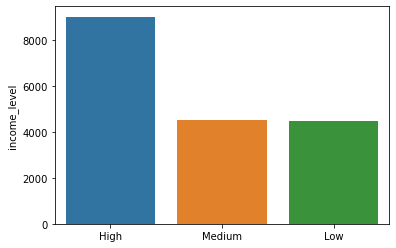

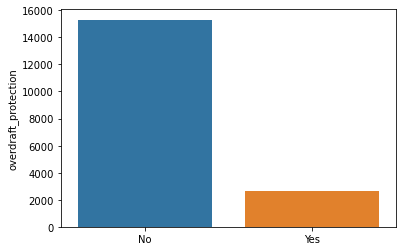

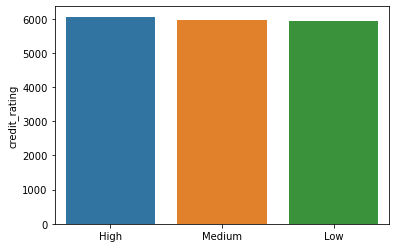

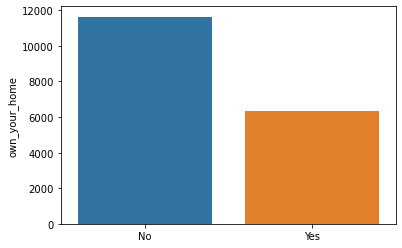

In [82]:
# plot Categoricals values
for i in list(categoricals.columns):
    sns.barplot(x=categoricals[i].unique(),y=categoricals[i].value_counts())
    plt.show()

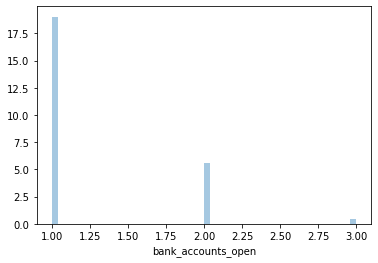

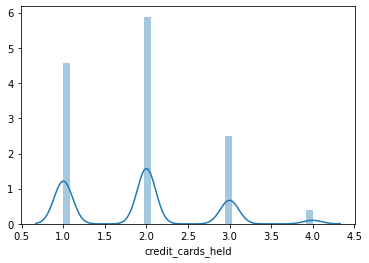

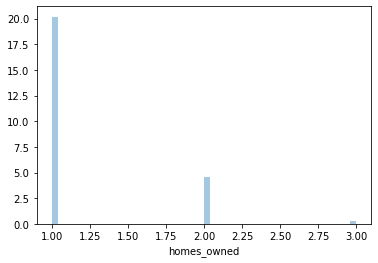

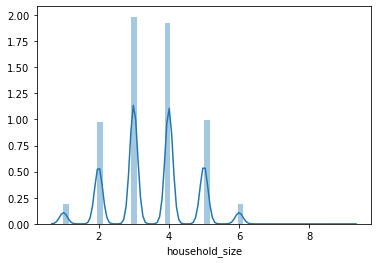

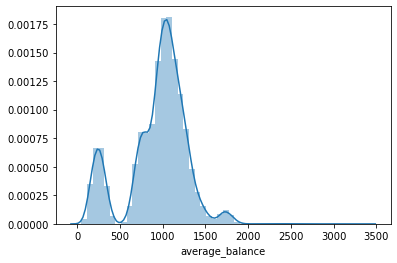

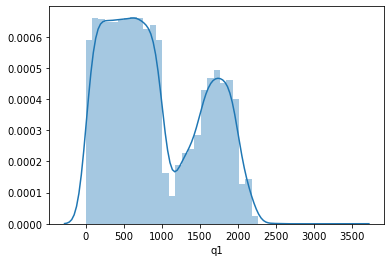

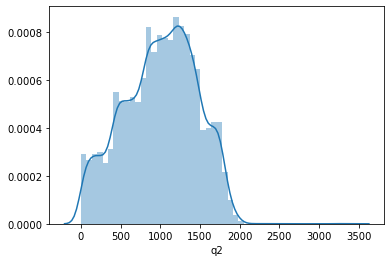

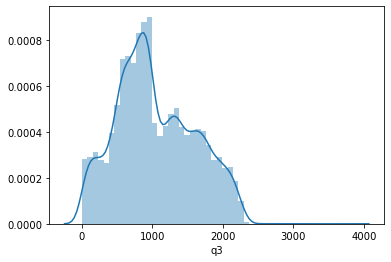

In [83]:
# plot Numericals values
for i in list(numericals.columns):
    sns.distplot(numericals[i])
    plt.show()

bank_accounts_open


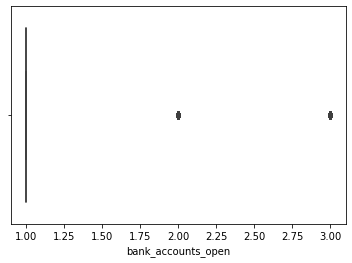

credit_cards_held


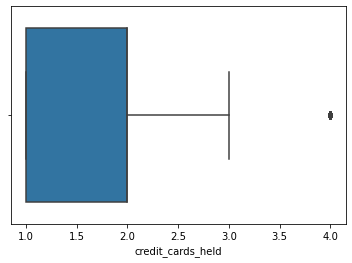

homes_owned


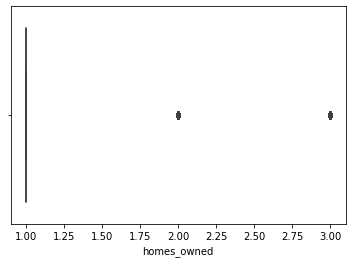

household_size


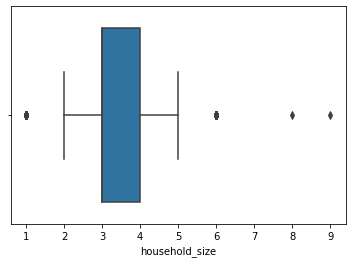

average_balance


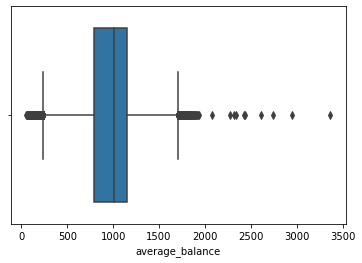

q1


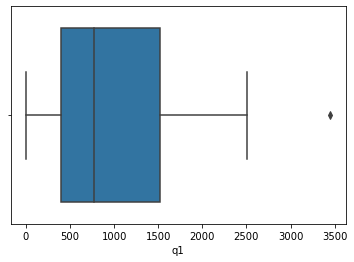

q2


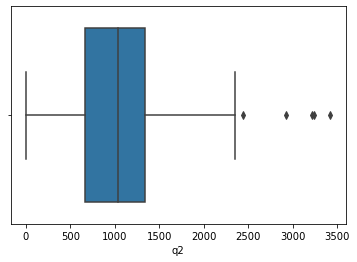

q3


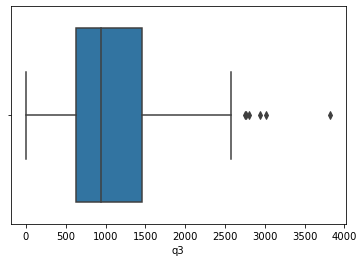

In [120]:
# Check outliers

for i in numericals.columns:
    print (i)
    sns.boxplot(x=numericals[i])
    plt.show()

Outliers are important for the model. They are necessary for the prediction. 
Data set is pretty clean so we don’t have to remove outliers.

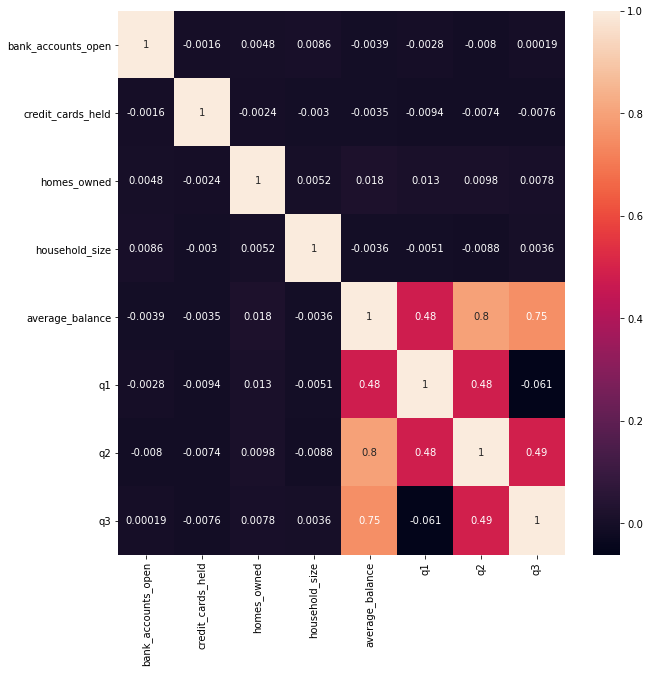

In [86]:
# Correlation matrix using pearson method for numericals values
corr_matrix=numericals.corr(method='pearson') # default
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [97]:
# Normalizer

from sklearn.preprocessing import Normalizer
X = data.select_dtypes(include = np.number)

transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [34]:
y = data['offer_accepted']
X = new_data

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [103]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [104]:
predictions = classification.predict(X_test)
print("The accuracy of the model is: %4.2f" % (classification.score(X_test, y_test)))

The accuracy of the model is: 0.94


In [105]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, predictions)

array([[6785,    1],
       [ 404,    1]])

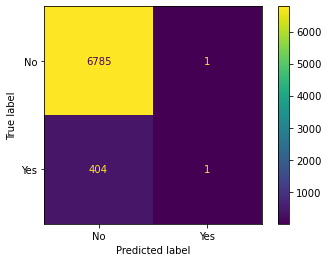

In [106]:
plot_confusion_matrix(classification, X_test, y_test) 

In [107]:
# Standardizer

from sklearn.preprocessing import StandardScaler
X2 = data.select_dtypes(include = np.number)

transformer = StandardScaler().fit(X2)
x_standarized = transformer.transform(X2)
x_standarized = pd.DataFrame(x_standarized)

In [158]:
y = data['offer_accepted']
X = new_data

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [110]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [111]:
predictions = classification.predict(X_test)
print("The accuracy of the model is: %4.2f" % (classification.score(X_test, y_test)))

The accuracy of the model is: 0.94


In [147]:
from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.01 


In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       1.00      0.00      0.01       292
          No       0.94      1.00      0.97      4877

    accuracy                           0.94      5169
   macro avg       0.97      0.50      0.49      5169
weighted avg       0.95      0.94      0.92      5169



In [ ]:
# Offer_accepted target variable : yes/no very unbalance... 
# We should use resample (try with undersample and oversample to see the difference)

#### Oversampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [36]:
smote = SMOTE(random_state=74)

# transformer = StandardScaler().fit(new_data)
# X = transformer.transform(new_data)
X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

Yes    16955
No     16955
Name: offer_accepted, dtype: int64

In [156]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)
y_sm = y_sm.to_numpy()
y_sm = pd.Series(data=y_sm.flatten())
y_sm.value_counts()

Yes    16955
No     16955
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=58)

classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=['Yes','No']))
print(X_sm)

The accuracy of the logistic_regression model is: 0.81 
The kappa of the logistic regression model is: 0.63 
              precision    recall  f1-score   support

         Yes       0.80      0.84      0.82      3413
          No       0.83      0.79      0.81      3369

    accuracy                           0.81      6782
   macro avg       0.81      0.81      0.81      6782
weighted avg       0.81      0.81      0.81      6782

       bank_accounts_open  credit_cards_held  homes_owned  household_size  \
0                       1                  2            1               4   
1                       1                  2            2               5   
2                       2                  2            1               2   
3                       2                  1            1               4   
4                       1                  2            1               6   
...                   ...                ...          ...             ...   
33905                   1

#### Undersampling

Resampling methods are designed to change the composition of a training dataset for an imbalanced classification task.

Most of the attention of resampling methods for imbalanced classification is put on oversampling the minority class. Nevertheless, a suite of techniques has been developed for undersampling the majority class that can be used in conjunction with effective oversampling methods.

There are many different types of undersampling techniques, although most can be grouped into those that select examples to keep in the transformed dataset, those that select examples to delete, and hybrids that combine both types of methods.

In [38]:
from sklearn.utils import resample

#downsample majority
not_credit_downsampled, y_res = resample(X[y == "No"],y[y == "No"],
                                replace=False, # sample without replacemente
                                n_samples=len(X[y == "Yes"]), # match minority n
                                random_state=0) #reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_credit_downsampled, X[y == "Yes"]])
y_res = pd.concat([y_res, y[y == "Yes"]])
y_res.value_counts()

Yes    1021
No     1021
Name: offer_accepted, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(downsampled, y_res, test_size=0.2, random_state=58)

In [40]:
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train)

In [41]:
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.67 


In [43]:
y_pred = classification.predict(X_test)
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.34 


Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=56)

In [81]:
#    svc = SVC(random_state=42)    svc.fit(X_train, y_train)
clf = RandomForestClassifier(random_state=56).fit(X_train, y_train.values.ravel())

In [88]:
y_pred = clf.predict(X_test)

In [91]:
print("The accuracy of the model is: %4.2f" % (clf.score(X_test, y_test)))

The accuracy of the model is: 0.91


In [92]:
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.82 


In [93]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, predictions)

array([[3018,  382],
       [ 216, 3166]])

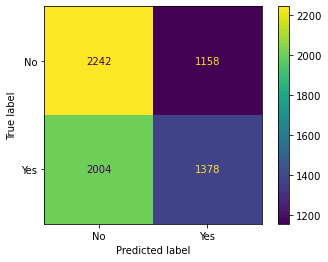

In [94]:
plot_confusion_matrix(classification, X_test, y_test) 

In [111]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [133]:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train.values.ravel())

# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz

In [154]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_test,
                class_names = y_test,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

ValueError: Length of feature_names, 6782 does not match number of features, 14

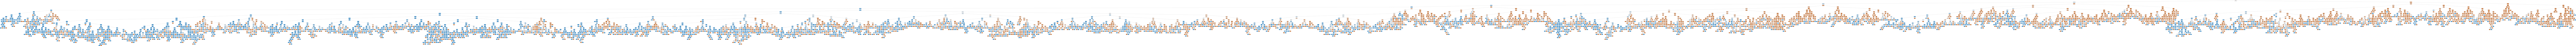

In [148]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

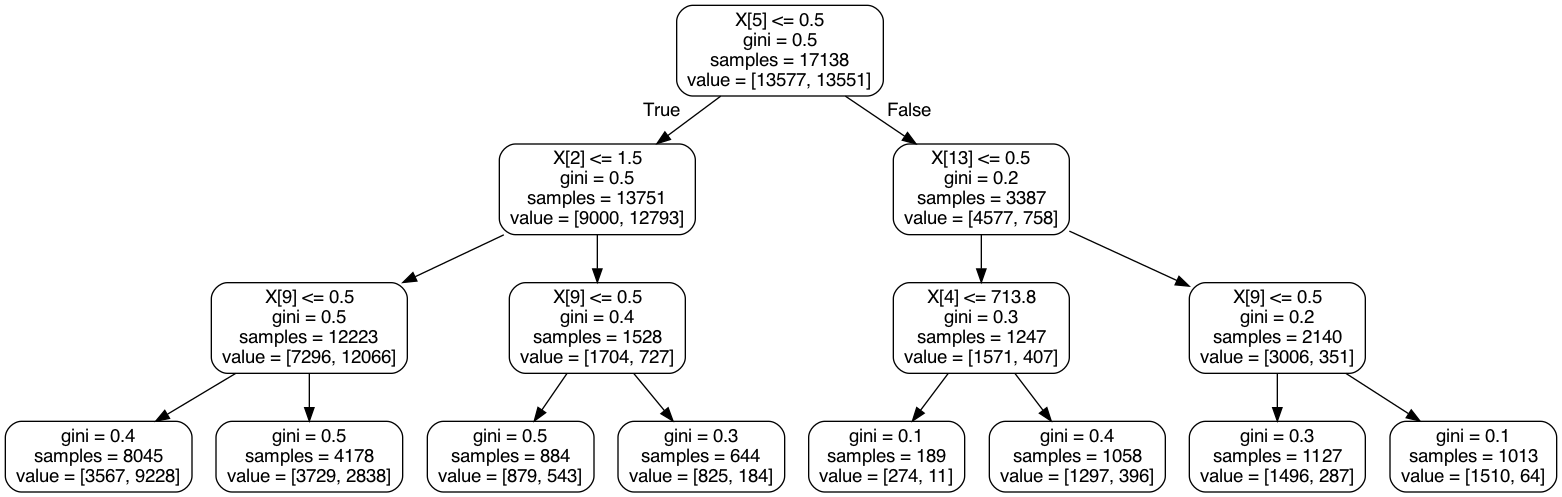

In [156]:
# Limit depth of tree to 3 levels
model_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
model_small.fit(X_train, y_train.values.ravel())

# Extract the small tree
tree_small = model_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', 
                #feature_names = feature_list, 
                rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

from IPython.display import Image
Image(filename = 'small_tree.png')

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = list(range(1,9,2)) # Creating odd list K for KNN, avoiding evens incase of ties

cv_scores = [ ] #list that will hold cv scores

#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())

<function matplotlib.pyplot.show(*args, **kw)>

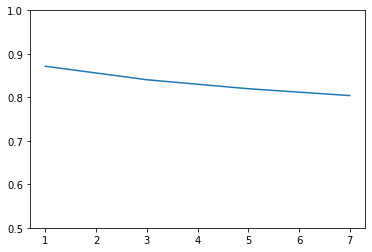

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = list(range(1,9,2)) # Creating odd list K for KNN, avoiding evens incase of ties

cv_scores = [ ] #list that will hold cv scores

#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean()) #Plot the cv_scores results
sns.lineplot(x = neighbors, y = cv_scores)
plt.ylim(0.5,1)
plt.show

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=56)
neigh = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train.values.ravel())